# Linear Regression Example

A linear regression learning algorithm example using TensorFlow library.

In [2]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [3]:


sess = tf.Session()


In [4]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [5]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [6]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [7]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [8]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [9]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

None
Epoch: 0050 cost= 0.146029964 W= 0.39656287 b= -0.25582004
Epoch: 0100 cost= 0.138049766 W= 0.387822 b= -0.1929384
Epoch: 0150 cost= 0.130991265 W= 0.37960076 b= -0.13379632
Epoch: 0200 cost= 0.124748088 W= 0.3718687 b= -0.0781719
Epoch: 0250 cost= 0.119226106 W= 0.3645964 b= -0.025855614
Epoch: 0300 cost= 0.114342041 W= 0.3577566 b= 0.023349173
Epoch: 0350 cost= 0.110022202 W= 0.3513237 b= 0.06962754
Epoch: 0400 cost= 0.106201485 W= 0.3452733 b= 0.11315351
Epoch: 0450 cost= 0.102822207 W= 0.3395828 b= 0.15409072
Epoch: 0500 cost= 0.099833429 W= 0.3342307 b= 0.19259335
Epoch: 0550 cost= 0.097190052 W= 0.32919693 b= 0.22880584
Epoch: 0600 cost= 0.094852135 W= 0.32446238 b= 0.2628653
Epoch: 0650 cost= 0.092784420 W= 0.32000953 b= 0.29489893
Epoch: 0700 cost= 0.090955734 W= 0.3158216 b= 0.32502726
Epoch: 0750 cost= 0.089338504 W= 0.31188273 b= 0.35336298
Epoch: 0800 cost= 0.087908223 W= 0.30817804 b= 0.38001394
Epoch: 0850 cost= 0.086643293 W= 0.3046937 b= 0.40508008
Epoch: 0900 cost

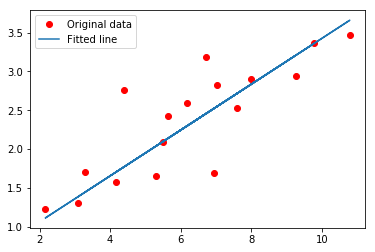

In [10]:
# Start training
with tf.Session() as sess:
    sess.run(init)
    writer = tf.summary.FileWriter('./graphs', sess.graph)
    print(sess.run(init))
    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()